In [61]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [12]:
df = pd.read_csv('/content/StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [15]:
df['overall score'] = np.round((df['math score'] + df['writing score'] + df['reading score']) / 3, 2)

In [20]:
df.sample(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,overall score
519,female,group B,high school,free/reduced,completed,67,78,79,74.67
312,male,group D,bachelor's degree,standard,completed,67,61,68,65.33
13,male,group A,some college,standard,completed,78,72,70,73.33
984,female,group C,some high school,standard,none,74,75,82,77.00
255,female,group E,some college,standard,none,62,73,70,68.33


In [21]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
overall score                  0
dtype: int64

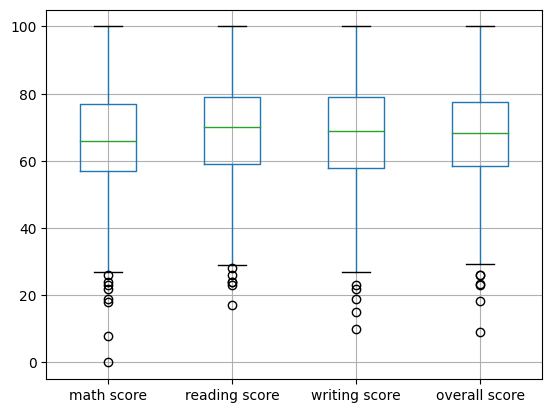

In [25]:
df[['math score', 'reading score', 'writing score', 'overall score']].boxplot()
plt.show()

In [26]:
df[['math score', 'reading score', 'writing score', 'overall score']].describe()

,math score,reading score,writing score,overall score
count,1000.00000,1000.000000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000,67.770580
std,15.16308,14.600192,15.195657,14.257311
min,0.00000,17.000000,10.000000,9.000000
25%,57.00000,59.000000,57.750000,58.330000
50%,66.00000,70.000000,69.000000,68.330000
75%,77.00000,79.000000,79.000000,77.670000
max,100.00000,100.000000,100.000000,100.000000


In [27]:
df['race/ethnicity'].value_counts()

group C    319
group D    262
group B    190
group E    140
group A     89
Name: race/ethnicity, dtype: int64

In [29]:
df['parental level of education'].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

In [53]:
encoder = OneHotEncoder(
    categories='auto',
    drop='first',
    handle_unknown='error',
    sparse_output=False,

)

In [54]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score', 'overall score'],
      dtype='object')

In [55]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(['overall score'], axis = 1), df['overall score'], test_size = 0.3, random_state = 15)

In [58]:
ct = ColumnTransformer(
    [('encoding',
      encoder,
       ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']
       )
    ],
    remainder='passthrough',
    verbose_feature_names_out=False
)

ct.set_output(transform = 'pandas')

ColumnTransformer(remainder='passthrough',
                  transformers=[('encoding',
                                 OneHotEncoder(drop='first',
                                               sparse_output=False),
                                 ['gender', 'race/ethnicity',
                                  'parental level of education', 'lunch',
                                  'test preparation course'])],
                  verbose_feature_names_out=False)

In [59]:
X_train = ct.fit_transform(X_train)
X_test = ct.fit_transform(X_test)

In [60]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [63]:
# Make predictions on both training and testing data
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

r_squared_train = r2_score(y_train, y_train_pred)
r_squared_test = r2_score(y_test, y_test_pred)

In [64]:
print(f"Training R2: {r_squared_train}")
print(f"Testing R2: {r_squared_test}")

Training R2: 0.9999999664099908
Testing R2: 0.999999958846745
